# Image classification

### Data Collection

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


--2020-07-11 04:34:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.126.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   114MB/s    in 0.6s    

2020-07-11 04:34:20 (114 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile
local_zip="/tmp/cats_and_dogs_filtered.zip"## which zip file you want to extract
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir("/tmp/cats_and_dogs_filtered")

['vectorize.py', 'validation', 'train']

In [ ]:
os.listdir("/tmp/cats_and_dogs_filtered/train")

['cats', 'dogs']

In [ ]:
len(os.listdir("/tmp/cats_and_dogs_filtered/train/dogs"))

1000

In [ ]:
len(os.listdir("/tmp/cats_and_dogs_filtered/train/cats"))

1000

In [ ]:
base_dir="/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
## Directory with training cat pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cat_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [ ]:
## File names
train_cat_filenames=os.listdir(train_cat_dir)
train_cat_filenames[:4]


['cat.617.jpg', 'cat.11.jpg', 'cat.417.jpg', 'cat.277.jpg']

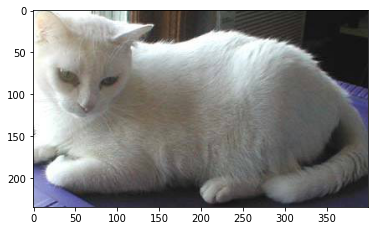

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_cat_dir+'/cat.955.jpg'))

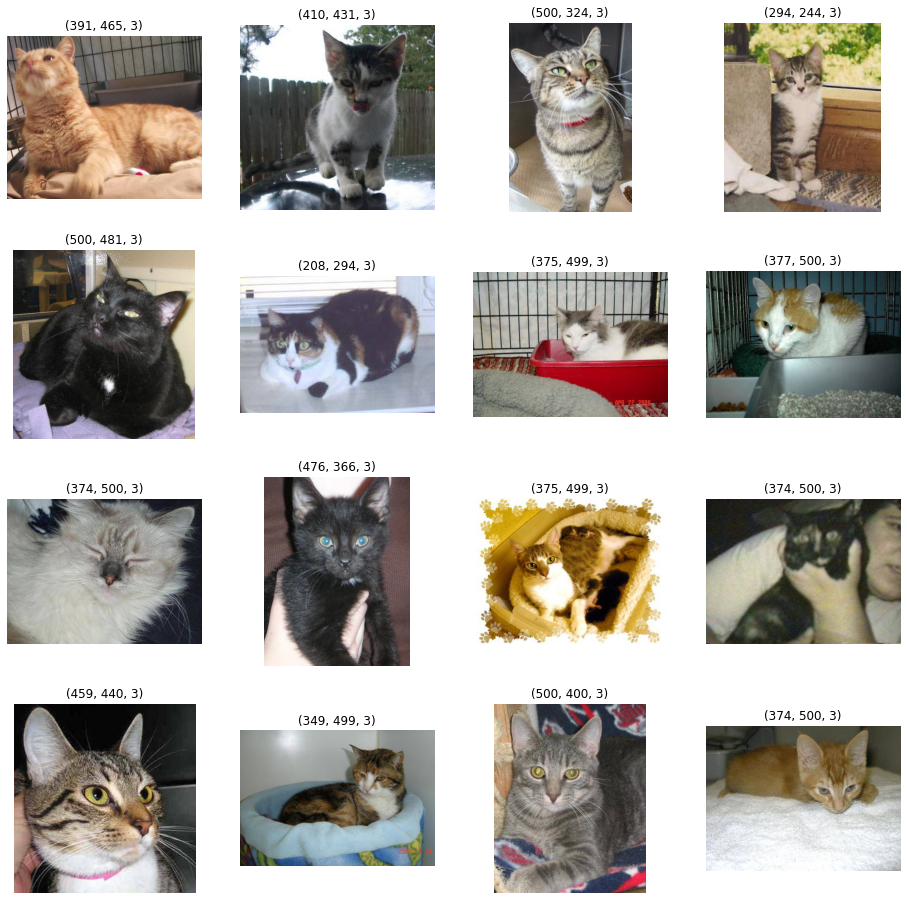

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j=1 ##plot position
for i in range(16):
  img=plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j+=1

# Data Preprocessing
Read the image data<br>
We have different shapes here.<br>
We need same shape for each and every image<br>
reshaing the images<br>
cats and dogs labelling<br>

# Creating Train and validation data from Folder

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator

(20, 150, 150, 3)
(20,)


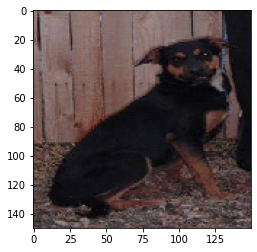

In [ ]:
imgs,labels = train_generator.next()
#print(i)
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

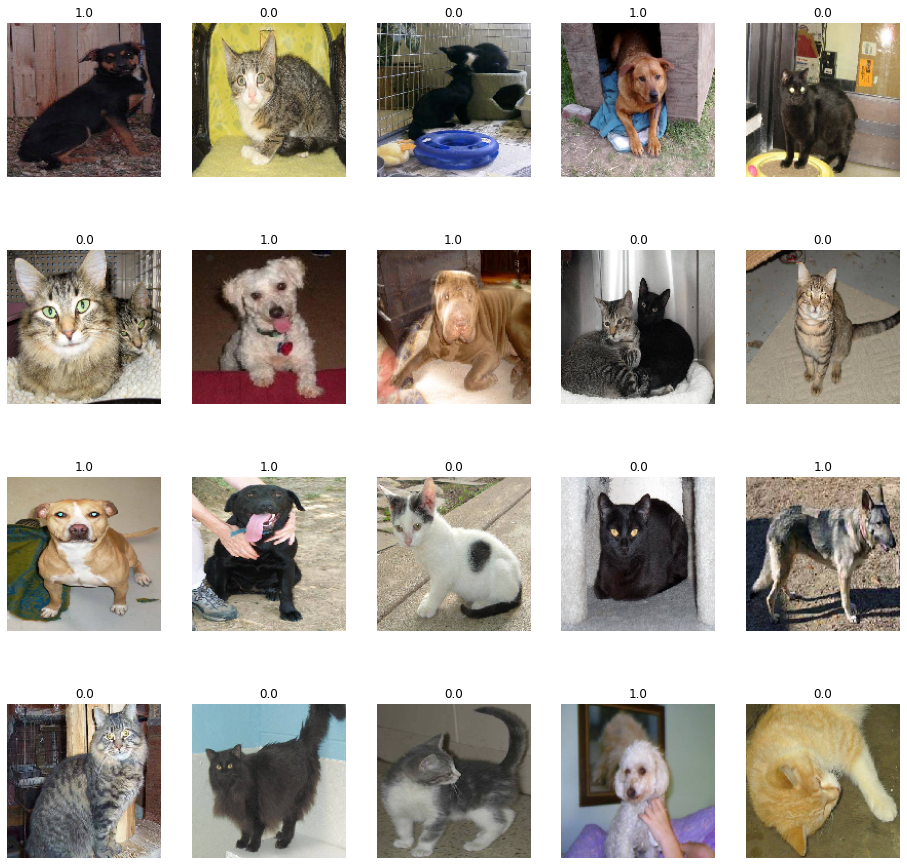

In [ ]:
plt.figure(figsize=(16,16))
pos=1 ##plot position
for i in range(20):
  
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:])
  plt.title(labels[i])
  plt.axis('off')
  pos+=1

In [ ]:
## import required methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [ ]:
model = Sequential()
## add a conv layer followed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
# Convert the featuremap into 1D  array
model.add(Flatten())
# Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
## Final output layer
model.add(Dense(1,activation='sigmoid'))

#let us see the summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [53]:
### Compiling the model
import tensorflow as tf

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

## train the model


In [55]:
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)


Epoch 1/15
100/100 [==============================] - 9s 94ms/step - loss: 0.8059 - accuracy: 0.5475 - val_loss: 0.6570 - val_accuracy: 0.5480
Epoch 2/15
100/100 [==============================] - 9s 90ms/step - loss: 0.6203 - accuracy: 0.6555 - val_loss: 0.6342 - val_accuracy: 0.6360
Epoch 3/15
100/100 [==============================] - 9s 90ms/step - loss: 0.5600 - accuracy: 0.7155 - val_loss: 0.5850 - val_accuracy: 0.6950
Epoch 4/15
100/100 [==============================] - 9s 89ms/step - loss: 0.5052 - accuracy: 0.7550 - val_loss: 0.5760 - val_accuracy: 0.7130
Epoch 5/15
100/100 [==============================] - 9s 86ms/step - loss: 0.4346 - accuracy: 0.7960 - val_loss: 0.5752 - val_accuracy: 0.7150
Epoch 6/15
100/100 [==============================] - 9s 86ms/step - loss: 0.3534 - accuracy: 0.8425 - val_loss: 0.5913 - val_accuracy: 0.7270
Epoch 7/15
100/100 [==============================] - 9s 87ms/step - loss: 0.2668 - accuracy: 0.8875 - val_loss: 0.6311 - val_accuracy: 0.7270

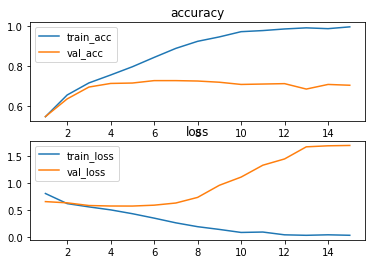

In [59]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,16))
plt.subplot(2,1,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

# To predict for an image

1. Read the image
2. check the shape
3. Resize into required shape(150* 150 *3)
4. Apply scaling

In [79]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = image.load_img('/tmp/scooby.jpg')
print(type(img))
img=tf.keras.preprocessing.image.img_to_array(img)
#Scaling
img=img/255
print(img.shape)
print(type(img))


<class 'PIL.JpegImagePlugin.JpegImageFile'>
(960, 541, 3)
<class 'numpy.ndarray'>


In [80]:
img=tf.image.resize(img,(150,150))
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [81]:
model.predict(img)

array([[0.84502244]], dtype=float32)

In [82]:
img = image.load_img('/tmp/garfield.jpg')
print(type(img))
img=tf.keras.preprocessing.image.img_to_array(img)
#Scaling
img=img/255
print(img.shape)
print(type(img))



<class 'PIL.JpegImagePlugin.JpegImageFile'>
(1200, 1200, 3)
<class 'numpy.ndarray'>


In [83]:
img=tf.image.resize(img,(150,150))
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [84]:
model.predict(img)

array([[0.00015045]], dtype=float32)

By using Sigmoid the range for prediction is :<br>
for Dog: x>=0.5<br>
for Cat: x< 0.5<br>